In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [2]:
# Importing CSV file - marked/unmarked
dfMarkedUnmarked = pd.read_csv('markedUnmarked.csv')

In [3]:
dfMarkedUnmarked2 = dfMarkedUnmarked.drop(['Seed'], axis = 1)

In [4]:
corr=dfMarkedUnmarked2.values
sizeMarked = np.zeros((1000,1))
sizeMarked[corr>0.5]=100
sizeMarked[corr<0.5]=12.5

In [6]:
(dfMarkedUnmarked2.max()).round(3)

Correlation    0.639
dtype: float64

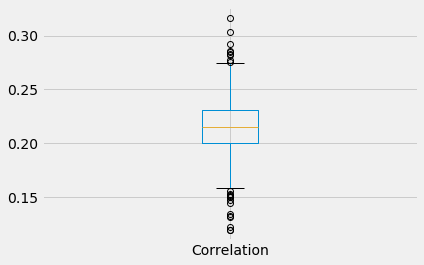

In [7]:
style.use('fivethirtyeight')
dfUnmarked = dfMarkedUnmarked2.drop([856])
dfUnmarked.boxplot()

In [8]:
(dfUnmarked.describe()).round(3)

,Correlation
count,999.000
mean,0.214
std,0.024
min,0.119
25%,0.200
50%,0.215
75%,0.230
max,0.317


Text(0, 1.04, 'All values except for one are clustered around low values.\nThat one high value represents the only marked image.')

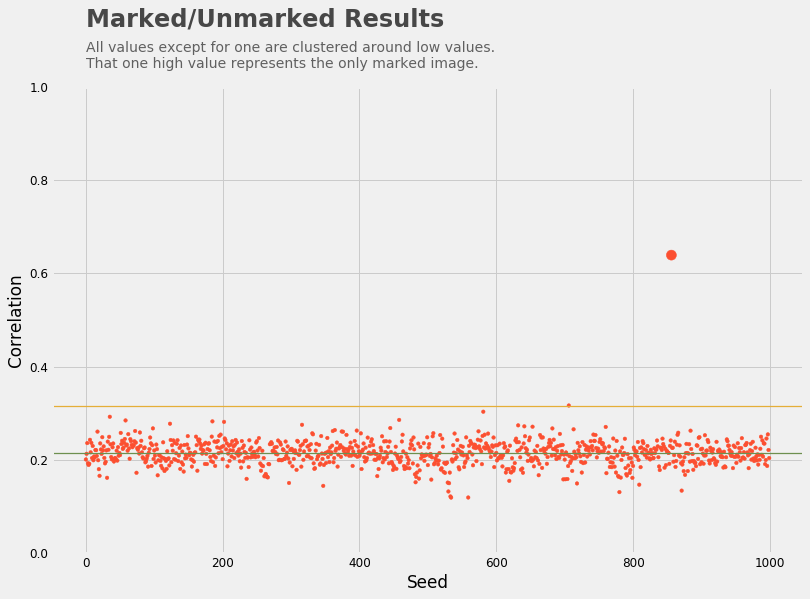

In [11]:
style.use('fivethirtyeight')

graph = dfMarkedUnmarked.plot(kind='scatter', x = 'Seed', y = 'Correlation', s = sizeMarked, color = '#fc4f30', figsize = (12, 8))

# Setting rules for labeling axes
graph.tick_params(axis = 'both', which = 'major', labelsize = 12)
graph.set_ylim(bottom=0, top=1)

# Title

# Y value is continuous to values on Y-axis. For instance, 
# if the maximum value is 60, the text can begin at 61.

# Alpha indicates text opacity

graph.text(x = 0, y = 1.13, s = "Marked/Unmarked Results",
               fontsize = 24, weight = 'bold', alpha = .7)

# Creating different lines accross the graph (can be used for important slices of results)
graph.axhline(y = dfUnmarked['Correlation'].max(), color = '#e5ae38', linewidth = 1.25, alpha = 1)
graph.axhline(y = dfUnmarked['Correlation'].median(), color = '#6d904f', linewidth = 1.25, alpha = 1)

# Subtitle
graph.text(x = 0, y = 1.04,
               s = "All values except for one are clustered around low values.\nThat one high value represents the only marked image.",
              fontsize = 14, alpha = .6)